# Numpy

In [1]:
import numpy as np

GIT_HUB = 'https://github.com/enthought/Numpy-Tutorial-SciPyConf-2019'

data = np.array([3,1.4, 9 , 0, 8 , 7.5])

print('Dimensions are %s of type %s' % (data.shape, data.dtype))

Dimensions are (6,) of type float64


In [2]:
print(type(data))

<class 'numpy.ndarray'>


In [3]:
print(data.ndim)

1


#### ndArray of zeros and ones

In [4]:
zerosArr = np.zeros((3,4))
onesArr = np.ones((3,2))
emptyArr = np.empty((2,3,2))
emptyArr

array([[[4.45057637e-308, 1.78021527e-306],
        [8.45549797e-307, 1.37962049e-306],
        [1.11260619e-306, 1.78010255e-306]],

       [[9.79054228e-307, 4.45057637e-308],
        [8.45596650e-307, 9.34602321e-307],
        [4.94065646e-322, 0.00000000e+000]]])

In [5]:
eyes = np.eye(3 , dtype= np.int32)
eyes = eyes.astype(np.float32)
eyes

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

## Arithmatic Operations

In [6]:
arr1 = np.array([[1,3,5], [7,3,2]], dtype = np.int32)
arr2 = np.array([[32,21,94], [65,31,12]], dtype = np.int32)

print('Element wise addition %s' % str(arr1 + arr2))
print('Element wise multiplication %s' % str(arr1 * arr2))
print('Element wise Comparision %s' % str(arr1 < arr2))

Element wise addition [[33 24 99]
 [72 34 14]]
Element wise multiplication [[ 32  63 470]
 [455  93  24]]
Element wise Comparision [[ True  True  True]
 [ True  True  True]]


## Basic Indexing and Slicing

In [7]:
arr3d = np.array(
    [
    [[3,2,5], [5,7,1],
    [11,1,0], [3,76,132],
    [2,6,8], [4,3,7]]
    ])

arr2d = arr3d[0].copy()
arr3d[0,1,0]


5

Slicing exercise
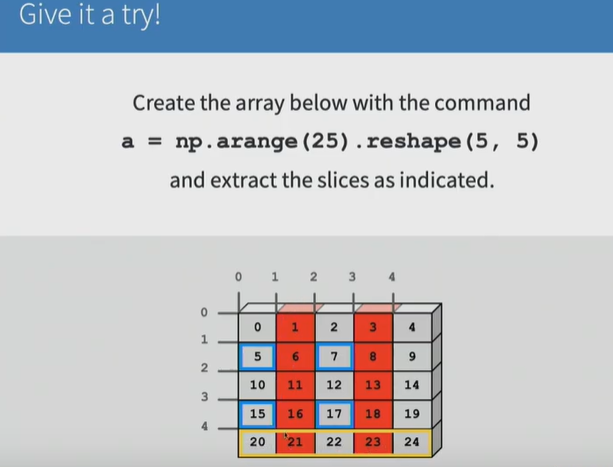

In [8]:
q1 = np.arange(25).reshape(5,5)
red = q1[:, 1::2]
q1[:,3] #yellow 
q1[-1, :] # yellow
q1[-1] # yellow

blue = q1[1::2, :3:2]
blue

#an4

array([[ 5,  7],
       [15, 17]])

## Filter Image using Slicing and Indexing

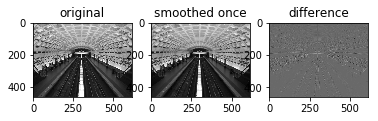

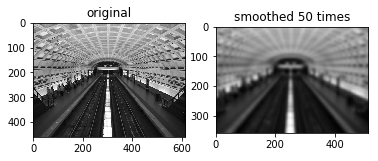

In [11]:
"""
Filter Image
------------
Read in the "dc_metro" image and use an averaging filter
to "smooth" the image.  Use a "5 point stencil" where
you average the current pixel with its neighboring pixels::
              0 0 0 0 0 0 0
              0 0 0 x 0 0 0
              0 0 x x x 0 0
              0 0 0 x 0 0 0
              0 0 0 0 0 0 0
Plot the image, the smoothed image, and the difference between the
two.
Bonus
~~~~~
Re-filter the image by passing the result image through the filter again. Do
this 50 times and plot the resulting image.
"""
import matplotlib.pyplot as plt

def smooth(img):
    avg_img =(    img[1:-1 ,1:-1]  # center
                + img[ :-2 ,1:-1]  # top
                + img[2:   ,1:-1]  # bottom
                + img[1:-1 , :-2]  # left
                + img[1:-1 ,2:  ]  # right
                ) / 5.0
    return avg_img


def smooth_loop(img):
    smoothed = np.zeros((img.shape[0]-2, img.shape[1]-2))
    for r in range(0, img.shape[0]-2):
        for c in range(0, img.shape[1]-2):
            smoothed[r, c] = (  img[r+1, c+1]  # center
                              + img[r  , c+1]  # top
                              + img[r+2, c+1]  # bottom
                              + img[r+1, c  ]  # left
                              + img[r+1, c+2]  # right
                             ) / 5.0
    return smoothed


img = plt.imread('datasets/dc_metro.png')
avg_img = smooth(img)

plt.figure()
# Set colormap so that images are plotted in gray scale.
plt.gray()
# Plot the original image first
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('original')

# Now the filtered image.
plt.subplot(1,3,2)
plt.imshow(avg_img)
plt.title('smoothed once')

# And finally the difference between the two.
plt.subplot(1,3,3)
plt.imshow(img[1:-1,1:-1] - avg_img)
plt.title('difference')


# Bonus: Re-filter the image by passing the result image
#        through the filter again.  Do this 50 times and plot
#        the resulting image.

for num in range(50):
    avg_img = smooth(avg_img)

# Plot the original image first
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('original')

# Now the filtered image.
plt.subplot(1,2,2)
plt.imshow(avg_img)
plt.title('smoothed 50 times')

assert np.allclose(smooth(img), smooth_loop(img))

plt.show()

### Boolean Indexing

In [ ]:
names = np.array(['Bob','Alice','Bob', 'Green', 'Taylor', 'Michele'])
rand_data = np.random.randn(6,4)
rand_data
rand_data[names == 'Bob', 2:]
# Consider names as a vector, and names == 'Bob' will return a vector of bool. And on boolean indexing,
# we get subset of array. Further columns can be sliced accordingly.
# We can also set conditions like cond = names == 'Alice'.
# For negation, use names != 'Alice'. Or ~(names == 'Alice)'
cond = names == 'Alice'
rand_data[~cond]

# Setting a value to a range of data
rand_data[rand_data < 0 ] = 0 # This would apply to all values that are less than zero

### Fancy Indexing

In [ ]:

arr = np.empty((8,4))

for v in range(8):
    arr[v] = v

# Now get data based on a list index
arr[[4,1,6,2]]

# And with another array
arr[[4,1,6,2], [0,2,3,1]]

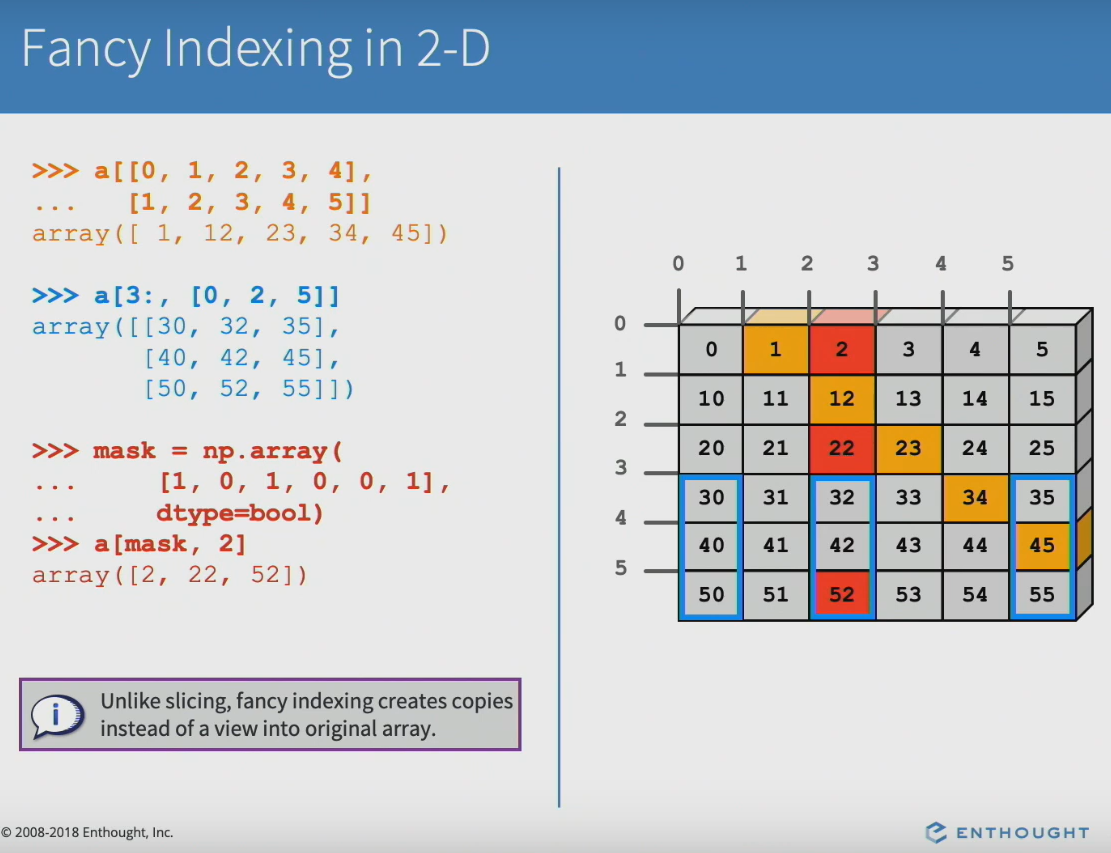

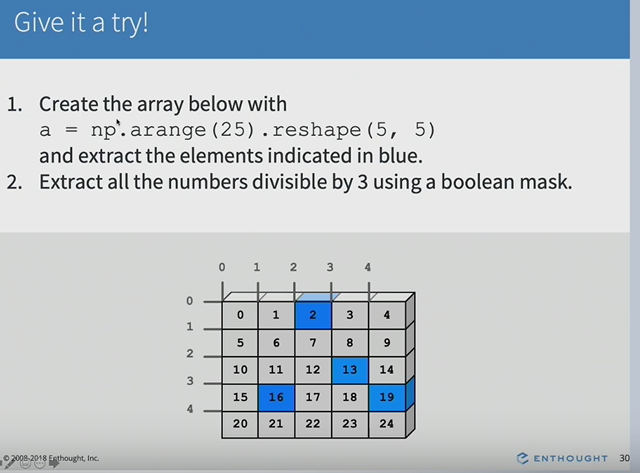

In [17]:
a = np.arange(25).reshape(5,5)
blue = a[[3,0,2,3], [1,2,3,4]]
divs3 = a[a % 3 == 0]
divs3

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

### Transposing Arrays and Swapping Axes

In [ ]:
arr = np.arange(15).reshape((3,5))
arr.T